#### Importing Packages and Loading Data

In [1]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
train_csv_path = './data/train.csv'
train_df = pd.read_csv(train_csv_path)

train_df.head()

,Text,Image
0,lounes,./data/train/train_000001.png
1,camalayarane,./data/train/train_000002.png
2,roy,./data/train/train_000003.png
3,munch,./data/train/train_000004.png
4,pierre,./data/train/train_000005.png


In [3]:
# Getting image path
image_paths = [f"./data/train/{file}" for file in os.listdir("./data/train")]

### Basic EDA on the dataset

In [4]:
# Summary statistics
train_df.describe()

,Text,Image
count,2000,2000
unique,2000,2000
top,lounes,./data/train/train_000001.png
freq,1,1


In [5]:
# Check for missing values
train_df.isnull().sum()

Text     0
Image    0
dtype: int64

In [6]:
# Distribution of text lengths
train_df['text_length'] = train_df['Text'].apply(len)
text_length_distribution = train_df['text_length'].describe()
text_length_distribution

count    2000.000000
mean        6.865000
std         2.334202
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        19.000000
Name: text_length, dtype: float64

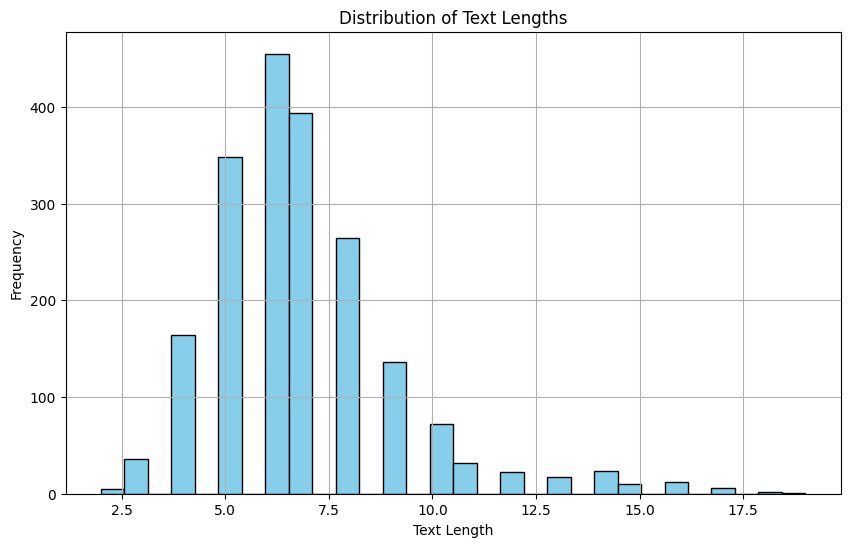

In [7]:
# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
plt.hist(train_df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

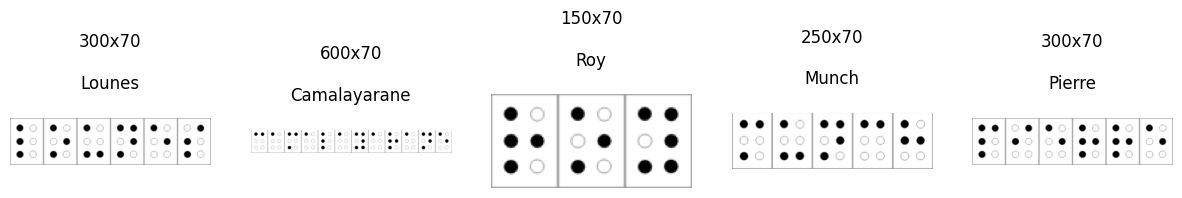

In [8]:
# Load and display the first few images with their dimensions
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(image_paths[:5]):
    img = Image.open(img_path)
    width, height = img.size
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{width}x{height}\n\n{train_df.iloc[i]["Text"].title()}\n')
    plt.axis('off')

plt.show()

In [9]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    img = Image.open(image_path)
    return img.size

# Verify the correspondence between text length and image width
train_df['image_width'] = train_df['Image'].apply(lambda x: get_image_dimensions(x)[0])
train_df['image_height'] = train_df['Image'].apply(lambda x: get_image_dimensions(x)[1])

In [10]:
# Check if image height is consistent
consistent_height = all(train_df['image_height'] == 70)
print(f"\nAll images have consistent height of 70 pixels: {consistent_height}")

# Calculate expected width
train_df['expected_width'] = train_df['text_length'] * 50

# Check for discrepancies between actual and expected width
width_discrepancies = (train_df['image_width'] != train_df['expected_width']).sum()
print(f"\nNumber of discrepancies between actual and expected image widths: {width_discrepancies}")


All images have consistent height of 70 pixels: True

Number of discrepancies between actual and expected image widths: 0


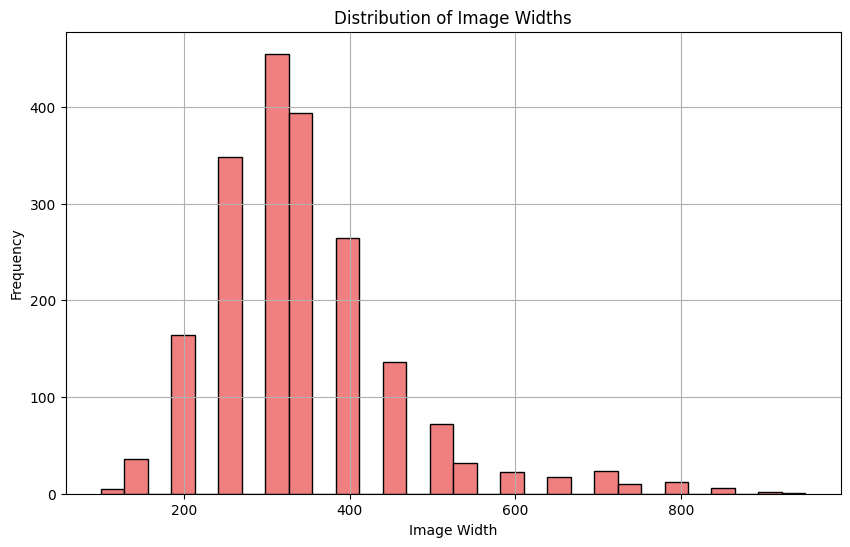

In [11]:
# Plot the distribution of image widths
plt.figure(figsize=(10, 6))
plt.hist(train_df['image_width'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Image Widths')
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
train_df.head()

,Text,Image,text_length,image_width,image_height,expected_width
0,lounes,./data/train/train_000001.png,6,300,70,300
1,camalayarane,./data/train/train_000002.png,12,600,70,600
2,roy,./data/train/train_000003.png,3,150,70,150
3,munch,./data/train/train_000004.png,5,250,70,250
4,pierre,./data/train/train_000005.png,6,300,70,300
